In [1]:
# Import numpy for matrix math and matplotlib for plotting
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Activation Functions
# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function for backpropagation
def sigmoid_derivative(x):
    return x * (1 - x)


In [3]:
#Input and Output for XOR
# XOR input values (4 samples, 2 features each)
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# Expected XOR outputs
y = np.array([[0], [1], [1], [0]])


In [4]:
#Initialize Weights and Biases
# Set seed for reproducibility
np.random.seed(1)

# Define number of neurons in each layer
input_layer_neurons = 2   # Input layer has 2 neurons (for XOR inputs)
hidden_layer_neurons = 4  # Hidden layer can have more neurons (trial and error)
output_neurons = 1        # Output layer has 1 neuron (binary output)

# Random weights for input to hidden layer (2x4)
wh = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))

# Bias for hidden layer (1x4)
bh = np.zeros((1, hidden_layer_neurons))

# Random weights for hidden to output layer (4x1)
wo = np.random.uniform(size=(hidden_layer_neurons, output_neurons))

# Bias for output layer (1x1)
bo = np.zeros((1, output_neurons))


In [5]:
#Training Loop (Forward + Backward Propagation)
# Number of training iterations (epochs)
epochs = 10000

# Learning rate (step size)
lr = 0.1

# Training using Gradient Descent
for epoch in range(epochs):
    # --- Forward Propagation ---
    
    # Calculate hidden layer input: dot product of inputs and weights + bias
    hidden_input = np.dot(X, wh) + bh
    
    # Apply sigmoid activation to hidden layer
    hidden_output = sigmoid(hidden_input)

    # Calculate output layer input: dot product of hidden output and weights + bias
    final_input = np.dot(hidden_output, wo) + bo
    
    # Apply sigmoid activation to get predicted output
    predicted_output = sigmoid(final_input)

    # --- Backward Propagation ---

    # Calculate error between predicted and actual output
    error = y - predicted_output

    # Derivative of sigmoid for output layer (gradient of error)
    d_output = error * sigmoid_derivative(predicted_output)

    # Backpropagate the error to the hidden layer
    error_hidden = d_output.dot(wo.T)

    # Derivative for hidden layer
    d_hidden = error_hidden * sigmoid_derivative(hidden_output)

    # --- Update Weights and Biases ---
    
    # Update weights from hidden to output layer
    wo += hidden_output.T.dot(d_output) * lr
    
    # Update output layer bias
    bo += np.sum(d_output, axis=0, keepdims=True) * lr

    # Update weights from input to hidden layer
    wh += X.T.dot(d_hidden) * lr
    
    # Update hidden layer bias
    bh += np.sum(d_hidden, axis=0, keepdims=True) * lr


In [6]:
# Output After Training
# Print predicted outputs after training
print("Final predictions after training:")
print(np.round(predicted_output))  # Round to get binary class predictions (0 or 1)


Final predictions after training:
[[0.]
 [1.]
 [1.]
 [0.]]


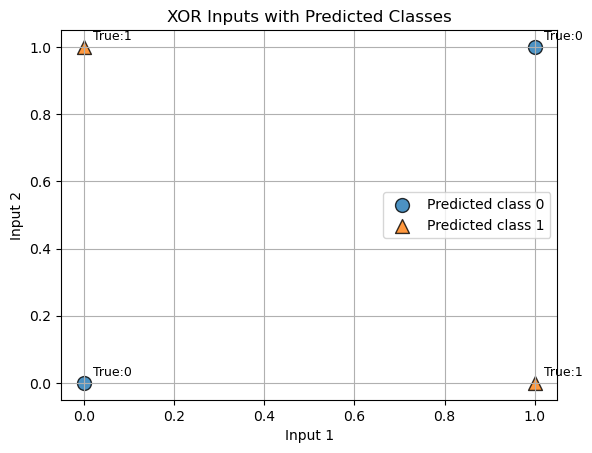

In [9]:

#Decision Boundary Visualization
def plot_points_with_predictions():
    # Forward pass on training inputs
    hidden_layer = sigmoid(np.dot(X, wh) + bh)
    output_layer = sigmoid(np.dot(hidden_layer, wo) + bo)
    
    # Convert output probabilities to class labels (0 or 1)
    predictions = (output_layer > 0.5).astype(int).flatten()
    
    # Plot data points
    for label in [0, 1]:
        # Select points with this label
        idx = np.where(predictions == label)
        plt.scatter(X[idx, 0], X[idx, 1], 
                    label=f"Predicted class {label}",
                    s=100,
                    alpha=0.8,
                    edgecolors='k',
                    marker='o' if label == 0 else '^')  # Different marker for each class
    
    # Plot true labels as text near points (optional)
    for i, (x1, x2) in enumerate(X):
        plt.text(x1 + 0.02, x2 + 0.02, f"True:{y[i][0]}", fontsize=9)
    
    plt.title("XOR Inputs with Predicted Classes")
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_points_with_predictions()
